In [1]:
pip install train

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# load the data into a pandas dataframe
df = pd.read_csv('global_temperatureCopy.csv')

In [4]:
# select the relevant columns for the analysis
df = df[['Year', 'AvgTemperature']]

# group the data by year and compute the global average temperature for each year
df = df.groupby('Year').mean()

# split the data into training and testing sets
train_data = df[:-30]
test_data = df[-30:]

In [5]:
# create polynomial features for the year column
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(train_data.index.values.reshape(-1, 1))
X_test = poly.fit_transform(test_data.index.values.reshape(-1, 1))

# train a linear regression model
model = LinearRegression()
model.fit(X_train, train_data['AvgTemperature'])

# generate predictions for the next 40 years
next_years = np.array(range(2020, 2060)).reshape(-1, 1)
X_next_years = poly.fit_transform(next_years)
predictions = model.predict(X_next_years)

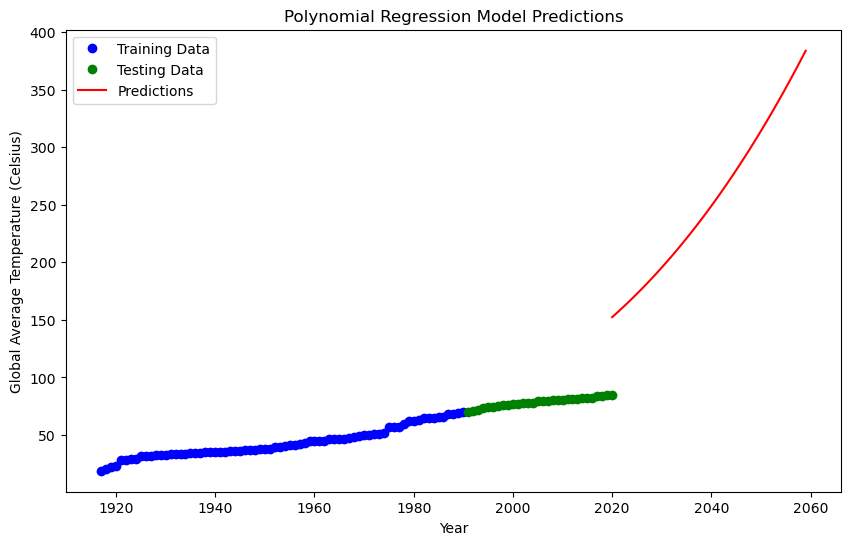

In [6]:
# plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# plot the training data
ax.plot(train_data.index, train_data['AvgTemperature'], 'bo', label='Training Data')

# plot the testing data
ax.plot(test_data.index, test_data['AvgTemperature'], 'go', label='Testing Data')

# plot the predictions
ax.plot(next_years, predictions, 'r-', label='Predictions')

ax.legend(loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Global Average Temperature (Celsius)')
ax.set_title('Polynomial Regression Model Predictions')

plt.show()